In [16]:
from aeon.forecasting.compose import make_reduction
from aeon.datasets import load_airline
from sklearn.ensemble import GradientBoostingRegressor
from aeon.utils.plotting import plot_series
import numpy as np
import pandas as pd
from aeon.forecasting.model_selection import temporal_train_test_split


In [17]:
y = load_airline()

In [18]:
random_data = np.random.random((y.shape[0], 3))
cols = [f'X{i+1}' for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.377199,0.825612,0.688158
1949-02,0.375520,0.601581,0.408880
1949-03,0.797721,0.911190,0.667125
1949-04,0.268087,0.323752,0.750348
1949-05,0.881929,0.683718,0.472445


In [19]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [20]:
fh = np.arange(len(y_test)) + 1

In [21]:
regressor = GradientBoostingRegressor(max_depth=None)
forecaster = make_reduction(regressor, window_length=20, strategy="recursive")
forecaster.fit(y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

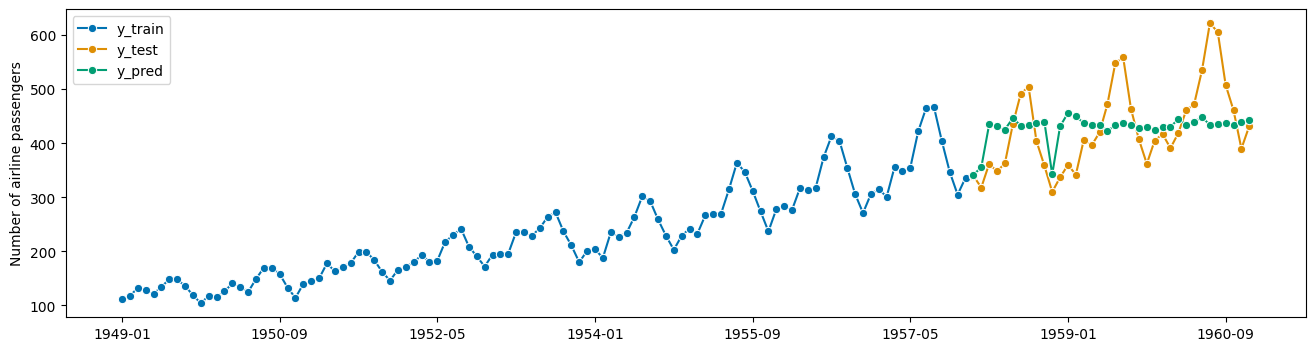

In [22]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])